# Models Considered

For this assignment, the following machine learning models were chosen to evaluate their performance:

1. **Naive Bayes**  
   A probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

2. **Linear SVM**  
   A type of Support Vector Machine (SVM) that finds the hyperplane which best separates the data into two classes.

3. **Random Forest**  
   An ensemble learning method that combines the predictions of multiple decision trees to improve classification accuracy and reduce overfitting.

# Loading the required libraries

In [ ]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, auc
from sklearn.pipeline import Pipeline

# MLflow Libraries
import mlflow
from mlflow.models import infer_signature

# Matplotlib
%matplotlib inline


# Train, Validation and Test data

In [4]:
train = pd.read_csv('./Data/train.csv')
val = pd.read_csv('./Data/validation.csv')
test = pd.read_csv('./Data/test.csv')

In [10]:
# preprocessing pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])
# fit the pipeline on training data
corpus = train['message']
pipeline.fit(corpus)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer())])

## Preparing data

In [11]:
X_train = pipeline.transform(train['message'])
X_val = pipeline.transform(val['message'])
X_test = pipeline.transform(test['message'])

y_train = train['label']
y_val = val['label']
y_test = test['label']

### Function to Print AUCPR and Plot Precision-Recall Curve and Function to Calculate PR AUC

In [ ]:
def plot_precision_recall_curve(y_true, y_scores):
    """
    This function calculates and prints the AUCPR (Area Under Precision-Recall Curve),
    and then plots the Precision-Recall curve.

    Parameters:
    y_true (array-like): True binary labels (0 or 1).
    y_scores (array-like): Predicted scores or probabilities for the positive class.
    """
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    
    auc_pr = auc(recall, precision)
    
    print(f"The AUCPR is: {auc_pr:.4f}")
    
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AUCPR = {auc_pr:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

def calculate_pr_auc(y_true, y_pred):
    """
    This function computes the PR AUC (Area Under the Precision-Recall Curve).
    
    Parameters:
    y_true (array-like): True binary labels (0 or 1).
    y_pred (array-like): Predicted labels or probabilities for the positive class.

    Returns:
    float: The computed PR AUC.
    """
    precision, recall, _ = precision_recall_curve(y_true, y_pred, pos_label=1)
    
    return auc(recall, precision)

### Store AUC-PR of each model

In [ ]:
auc_pr_df = pd.DataFrame({
    "AUC-PR": np.zeros(3)
})

auc_pr_df.index = ["Naive Bayes", "Linear SVM", "Random Forest"]

### For each of these models we use the parameters obtained from `` Assignment 1``

## 1. ``Naive Bayes``

In [ ]:
with mlflow.start_run() as run:
    
    # Set model parameters
    params = {"alpha": 1.0}
    model = MultinomialNB(**params)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val)
    
    # Create model signature for logging
    signature = infer_signature(X_val, y_val)
    
    # Log the model parameters
    mlflow.log_params(params)
    mlflow.log_param("model_name", "Multinomial NB Model")
    
    # Log performance metrics
    mlflow.log_metrics({
        "AUC-PR": calculate_pr_auc(y_val, y_pred),
        "Accuracy": accuracy_score(y_val, y_pred),
        "F1-Score": f1_score(y_val, y_pred)
    })
    
    # Log the trained model
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="Multinomial NB Model"
    )
    
    print("Model and metrics logged successfully!")

/root/AppliedMachineLearning/Assignment 2/myenv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Model and metrics logged successfully!


Successfully registered model 'Multinomial NB Model'.
Created version '1' of model 'Multinomial NB Model'.


## 2. ``Linear SVM``

In [24]:
with mlflow.start_run() as run:
    
    # Define model parameters for LinearSVC
    model_params = {"C": 1.0, "class_weight": None}
    
    # Initialize and train the Linear SVM model
    model = LinearSVC(**model_params)
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val)
    
    # Generate the model signature
    signature = infer_signature(X_val, y_val)
    
    # Log the parameters
    mlflow.log_params(model_params)
    mlflow.log_param("model_name", "Linear SVM Model")
    
    # Log performance metrics
    mlflow.log_metrics({
        "AUC-PR": calculate_pr_auc(y_val, y_pred),
        "Accuracy": accuracy_score(y_val, y_pred),
        "F1-Score": f1_score(y_val, y_pred)
    })
    
    # Log the model with signature and metrics
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="Linear SVM Model"
    )
    
    print("Linear SVM Model and metrics logged successfully!")

/root/AppliedMachineLearning/Assignment 2/myenv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Linear SVM Model and metrics logged successfully!


Successfully registered model 'Linear SVM Model'.
Created version '1' of model 'Linear SVM Model'.


## 3. ``Random Forest``

In [25]:
# Start the MLflow run
with mlflow.start_run() as run:
    
    # Define model parameters for RandomForest
    model_params = {"n_estimators": 100, "max_depth": None, "class_weight": None}
    
    # Initialize and train the Random Forest model
    model = RandomForestClassifier(**model_params)
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val)
    
    # Generate the model signature
    signature = infer_signature(X_val, y_val)
    
    # Log the parameters
    mlflow.log_params(model_params)
    mlflow.log_param("model_name", "Random Forest Model")
    
    # Log performance metrics
    mlflow.log_metrics({
        "AUC-PR": calculate_pr_auc(y_val, y_pred),
        "Accuracy": accuracy_score(y_val, y_pred),
        "F1-Score": f1_score(y_val, y_pred)
    })
    
    # Log the model with signature and metrics
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="Random Forest Model"
    )
    
    print("Random Forest Model and metrics logged successfully!")

/root/AppliedMachineLearning/Assignment 2/myenv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Random Forest Model and metrics logged successfully!


Successfully registered model 'Random Forest Model'.
Created version '1' of model 'Random Forest Model'.


### Loading each model

#### Naive Bayes

In [45]:
logged_model = "runs:/02f1379a8d534ebca9dfa599b8c7895f/sklearn-model"

model = mlflow.pyfunc.load_model(logged_model)
y_pred = model.predict(X_test)
auc_pr_df.loc['Naive Bayes', 'AUC-PR'] = calculate_pr_auc(y_test, y_pred).item()
calculate_pr_auc(y_test, y_pred).item()

0.8569241764806281

The AUCPR is: 0.8569


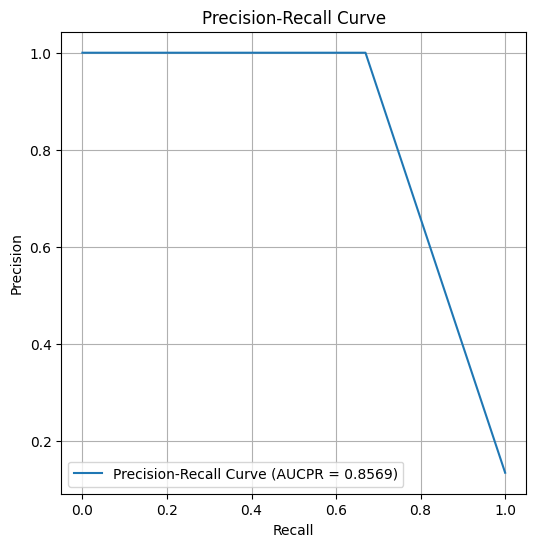

In [33]:
plot_precision_recall_curve(y_test, y_pred)

#### Linear SVM

In [46]:
logged_model = 'runs:/c587e24e5ff647f085a44b018dfa45b6/sklearn-model'

model = mlflow.pyfunc.load_model(logged_model)
y_pred = model.predict(X_test)
auc_pr_df.loc['Linear SVM', 'AUC-PR'] = calculate_pr_auc(y_test, y_pred).item()
calculate_pr_auc(y_test, y_pred).item()

0.9437931086413061

The AUCPR is: 0.9438


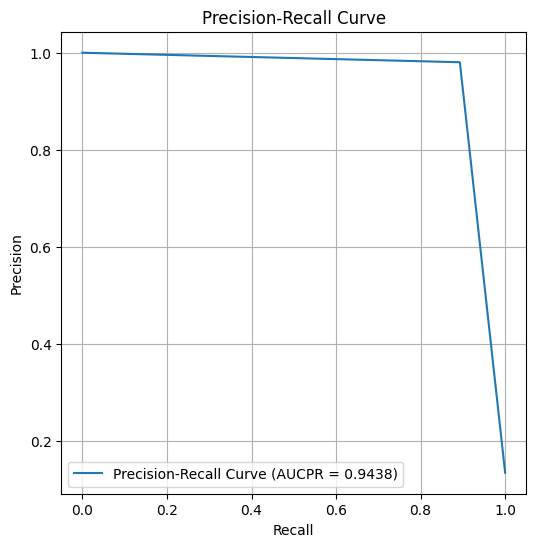

In [39]:
plot_precision_recall_curve(y_test, y_pred)

#### Random Forest

In [47]:
logged_model = 'runs:/a32f28747efe4705b31f285aadcfb6d5/sklearn-model'

model = mlflow.pyfunc.load_model(logged_model)
y_pred = model.predict(X_test)
auc_pr_df.loc['Random Forest', 'AUC-PR'] = calculate_pr_auc(y_test, y_pred).item()
calculate_pr_auc(y_test, y_pred).item()

0.9172853729305342

The AUCPR is: 0.9173


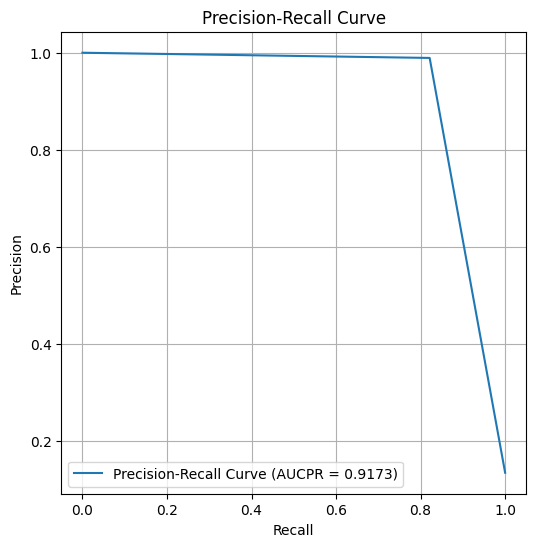

In [42]:
plot_precision_recall_curve(y_test, y_pred)

## Choosing the best model

In [48]:
auc_pr_df

,AUC-PR
Naive Bayes,0.856924
Linear SVM,0.943793
Random Forest,0.917285


## Best Model: Linear SVM

The **Linear SVM** achieves the highest AUC-PR of **0.943793**, indicating superior performance in spam classification. This model is effective at balancing precision and recall, making it the best choice for the task.

## Other Models:

- **Random Forest**: Achieving an AUC-PR of **0.917285**, Random Forest is a strong contender, though slightly behind Linear SVM. It is robust and can handle complex data well.
- **Naive Bayes**: With an AUC-PR of **0.856924**, Naive Bayes offers a simpler, faster solution but falls short in performance compared to the other models.
